Diamond Price Prediction

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [21]:
import pandas as pd

In [14]:
df=pd.read_csv('data/gemstone.csv')

In [22]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [23]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      1
table      1
x          1
y          1
z          1
price      1
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182002 entries, 0 to 182001
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       182002 non-null  int64  
 1   carat    182002 non-null  float64
 2   cut      182002 non-null  object 
 3   color    182002 non-null  object 
 4   clarity  182002 non-null  object 
 5   depth    182001 non-null  float64
 6   table    182001 non-null  float64
 7   x        182001 non-null  float64
 8   y        182001 non-null  float64
 9   z        182001 non-null  float64
 10  price    182001 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.3+ MB


In [26]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [27]:
df=df.drop(labels=['id'],axis=1)

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [29]:
df.duplicated().sum()

0

In [30]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [31]:
print("Numerical columns",numerical_columns)
print("Categorical columns",categorical_columns)

Numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [32]:
df[categorical_columns].describe()

,cut,color,clarity
count,182002,182002,182002
unique,5,7,9
top,Ideal,G,SI1
freq,87032,41748,50114


In [33]:
df['cut'].value_counts()

cut
Ideal        87032
Premium      46865
Very Good    35249
Good         10958
Fair          1898
Name: count, dtype: int64

In [34]:
df['color'].value_counts()

color
G    41748
E    33648
F    32262
H    28961
D    22825
I    16488
J     6070
Name: count, dtype: int64

In [35]:
df['clarity'].value_counts()

clarity
SI1     50114
VS2     45178
VS1     28804
SI2     28635
VVS2    14811
VVS1     9995
IF       3975
I1        489
S           1
Name: count, dtype: int64

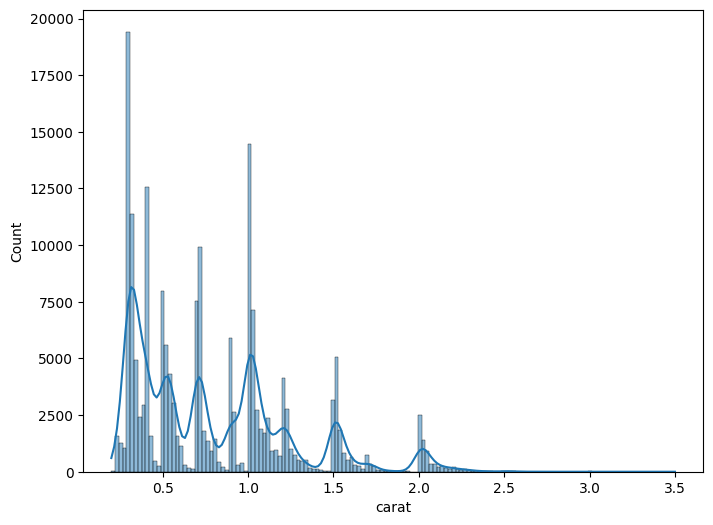

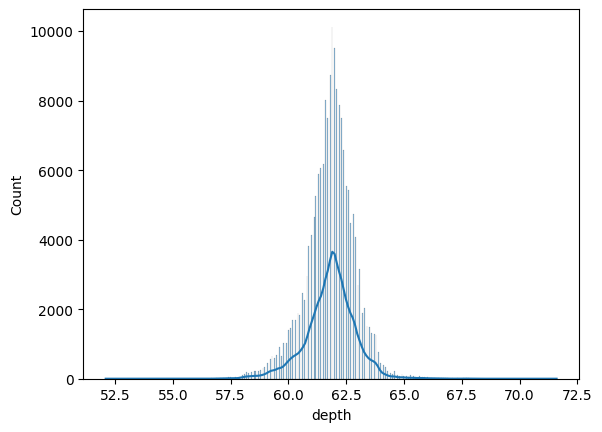

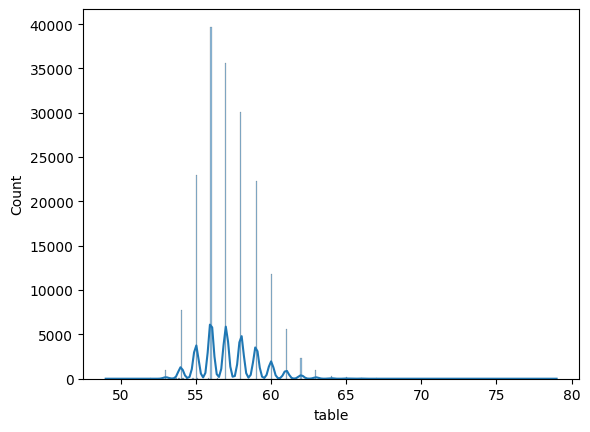

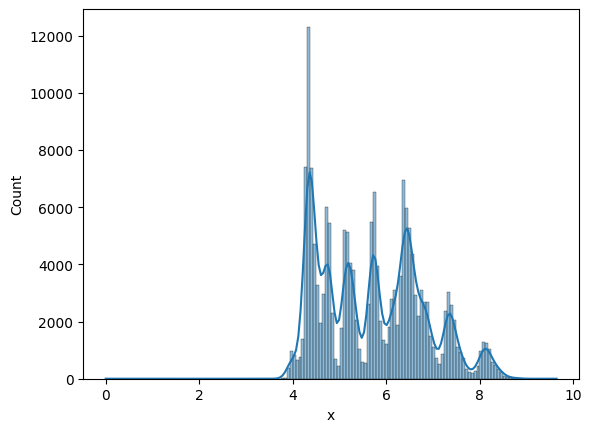

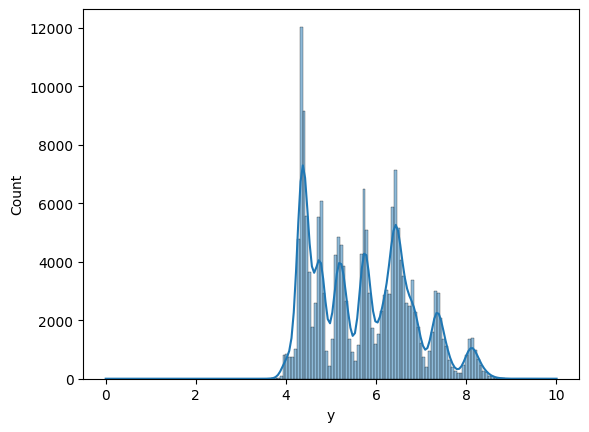

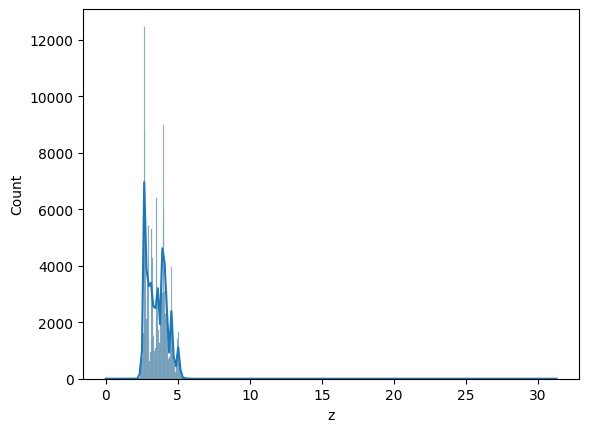

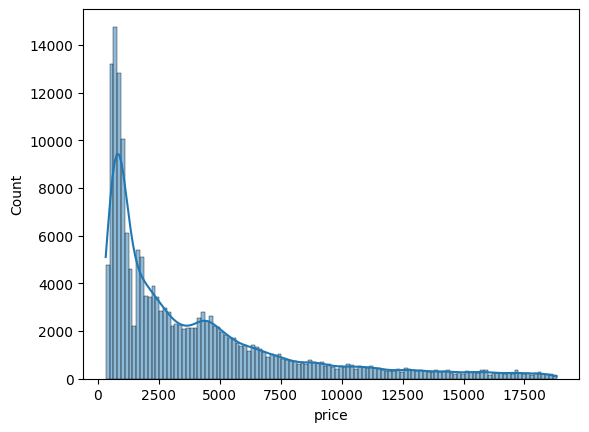

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [47]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Premium'

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [49]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [50]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [51]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1', 'S'],
      dtype=object)

In [52]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [54]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [55]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [56]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4.0,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3,7,2.0,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,5,4,5.0,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,5,4,5.0,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,4,4,4.0,62.6,59.0,7.65,7.61,4.77,14453.0
